In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=44fab650b8dc553d63297553bd2f9e61475e3dd66affb070c1b3b165edf41678
  Stored in directory: c:\users\mrpar\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("data\exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.dtypes

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition', 'koi_duration', 'koi_impact']]
selected_features

,koi_disposition,koi_duration,koi_impact
0,CONFIRMED,4.50700,0.586
1,FALSE POSITIVE,1.78220,0.969
2,FALSE POSITIVE,2.40641,1.276
3,CONFIRMED,1.65450,0.701
4,CONFIRMED,3.14020,0.762
...,...,...,...
6986,FALSE POSITIVE,4.80600,0.765
6987,FALSE POSITIVE,3.22210,1.252
6988,CANDIDATE,3.11400,0.043
6989,FALSE POSITIVE,0.86500,0.147


# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
X = selected_features[['koi_duration', 'koi_impact']]
y = selected_features['koi_disposition'].values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 2) (6991, 1)


In [24]:
data = selected_features.copy()

data = pd.get_dummies(data, columns=['koi_disposition'])

data.head()

,koi_duration,koi_impact,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,4.50700,0.586,0,1,0
1,1.78220,0.969,0,0,1
2,2.40641,1.276,0,0,1
3,1.65450,0.701,0,1,0
4,3.14020,0.762,0,1,0


In [25]:
X = data[['koi_duration', 'koi_impact']]
y = data['koi_disposition_CONFIRMED']
y = y.values.reshape(-1,1)
print(X.shape, y.shape)

(6991, 2) (6991, 1)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,koi_duration,koi_impact
6122,3.61600,0.150
6370,2.30900,0.291
2879,79.89690,0.970
107,2.63120,0.300
29,2.22739,0.831


In [12]:
#from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
#X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = X.copy()
print(scaler.fit(data))


MinMaxScaler()


In [28]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
#y_scaler = y_train

In [29]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [30]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

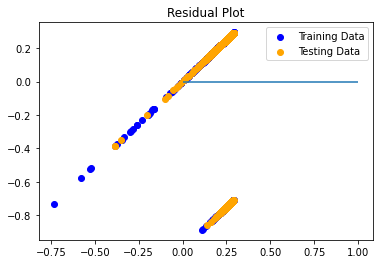

In [31]:
import matplotlib.pyplot as plt

# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [32]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, model.predict(X_test_scaled))
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19750270552940288, R2: 0.01357636331612777


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data


# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)